In [23]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


from astroquery.gaia import Gaia
import gdr2_completeness.tap_queries as tap
import gdr2_completeness.data_manipulation as dr2
import numpy as np
from astroquery.utils.tap.core import TapPlus
from time import sleep
from glob import glob1
from numpy.lib.recfunctions import stack_arrays
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm



# connecting to Gaia Archive
gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")
#gaia.login_gui()
gaia.login(user='your_user_name_here', password='your_password_her')






Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
OK


In [2]:
# Defining the HEALpix level at which to chunk the whole query

hpx_query = 2
nhpx = tap.number_of_healpixels(hpx_query)
hpx_query_res = tap.gaia_hpx_factor(hpx_query)
list_of_border_source_ids = []

for i in np.arange(nhpx+1):
    list_of_border_source_ids.append(i*hpx_query_res)


In [3]:
# Writing down the query 

query = """Select parallax,
phot_g_mean_mag, phot_rp_mean_mag, phot_bp_mean_mag
FROM gaiaedr3.gaia_source
WHERE source_id BETWEEN %d AND %d
And parallax_over_error > 50"""




QUERIES = []
for i,item in enumerate(list_of_border_source_ids):
    if i == len(list_of_border_source_ids)-1:
        continue
    QUERIES.append(query %(list_of_border_source_ids[i],list_of_border_source_ids[i+1]-1))



In [4]:
# Run it on the archive and reconnect if you get disconnected

for i in range(nhpx):
    try:
        print(i,nhpx)
        job = gaia.launch_job_async(QUERIES[i])
        print(i,job)
        r = job.get_results()
        print(len(r))
        np.save('../data/lvl2_%d.npy' %(i),r)
        lst = gaia.list_async_jobs(verbose=True)
        for i in lst:
                gaia.remove_jobs(i.jobid)
    except:
        print("reconnecting in 10sec")
        sleep(10)
        gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")
        gaia.login(user='your_user_name_here', password='your_password_here')
        print(i,nhpx)
        job = gaia.launch_job_async(QUERIES[i])
        print(i,job)
        r = job.get_results()
        print(len(r))
        np.save('../data/lvl2_%d.npy' %(i),r)
        lst = gaia.list_async_jobs(verbose=True)
        for i in lst:
                gaia.remove_jobs(i.jobid)


0 192
INFO: Query finished. [astroquery.utils.tap.core]
0 <Table length=39229>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     0
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   164
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   164
Jobid: 1614964523215O
Phase: COMPLETED
Owner: None
Output file: async_20210305181523.vot
Results: None
39229
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:15:48 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'no

200 200
[('Date', 'Fri, 05 Mar 2021 17:18:14 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614964672244O'.
8 192
INFO: Query finished. [astroquery.utils.tap.core]
8 <Table length=56090>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     1
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   178
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   179
Jobid: 1614964694678O
Phase: COMPLETED
Owner: None
Output file:

Removed jobs: '1614964836644O'.
15 192
INFO: Query finished. [astroquery.utils.tap.core]
15 <Table length=109823>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     6
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   388
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   390
Jobid: 1614964864987O
Phase: COMPLETED
Owner: None
Output file: async_20210305182105.vot
Results: None
109823
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:21:27 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 17:23:25 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614964988081O'.
23 192
INFO: Query finished. [astroquery.utils.tap.core]
23 <Table length=44361>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     3
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   210
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   211
Jobid: 1614965006534O
Phase: COMPLETED
Owner: None
Output fil

Removed jobs: '1614965118270O'.
30 192
INFO: Query finished. [astroquery.utils.tap.core]
30 <Table length=72729>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     9
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   253
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   256
Jobid: 1614965134755O
Phase: COMPLETED
Owner: None
Output file: async_20210305182534.vot
Results: None
72729
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:25:52 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN

200 200
[('Date', 'Fri, 05 Mar 2021 17:28:04 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614965259520O'.
38 192
INFO: Query finished. [astroquery.utils.tap.core]
38 <Table length=61218>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     6
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   319
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   320
Jobid: 1614965285202O
Phase: COMPLETED
Owner: None
Output fil

Removed jobs: '1614965396114O'.
45 192
INFO: Query finished. [astroquery.utils.tap.core]
45 <Table length=78225>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     5
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   321
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   322
Jobid: 1614965417293O
Phase: COMPLETED
Owner: None
Output file: async_20210305183017.vot
Results: None
78225
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:30:41 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN

200 200
[('Date', 'Fri, 05 Mar 2021 17:33:50 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614965612241O'.
53 192
INFO: Query finished. [astroquery.utils.tap.core]
53 <Table length=114182>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude    13
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   337
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   344
Jobid: 1614965631271O
Phase: COMPLETED
Owner: None
Output fi

Removed jobs: '1614965850613O'.
60 192
INFO: Query finished. [astroquery.utils.tap.core]
60 <Table length=194872>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude    15
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   754
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   756
Jobid: 1614965888506O
Phase: COMPLETED
Owner: None
Output file: async_20210305183808.vot
Results: None
194872
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:38:56 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 17:41:15 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614966060773O'.
68 192
INFO: Query finished. [astroquery.utils.tap.core]
68 <Table length=33797>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     4
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   166
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   166
Jobid: 1614966076155O
Phase: COMPLETED
Owner: None
Output fil

Removed jobs: '1614966174581O'.
75 192
INFO: Query finished. [astroquery.utils.tap.core]
75 <Table length=50994>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     1
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   166
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   167
Jobid: 1614966191028O
Phase: COMPLETED
Owner: None
Output file: async_20210305184311.vot
Results: None
50994
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:43:26 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN

200 200
[('Date', 'Fri, 05 Mar 2021 17:45:43 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614966322913O'.
83 192
INFO: Query finished. [astroquery.utils.tap.core]
83 <Table length=89971>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     3
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   356
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   356
Jobid: 1614966343950O
Phase: COMPLETED
Owner: None
Output fil

Removed jobs: '1614966473195O'.
90 192
INFO: Query finished. [astroquery.utils.tap.core]
90 <Table length=44881>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     3
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   172
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   172
Jobid: 1614966491669O
Phase: COMPLETED
Owner: None
Output file: async_20210305184811.vot
Results: None
44881
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:48:26 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN

200 200
[('Date', 'Fri, 05 Mar 2021 17:50:58 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614966639409O'.
98 192
INFO: Query finished. [astroquery.utils.tap.core]
98 <Table length=48911>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     2
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   163
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   164
Jobid: 1614966659503O
Phase: COMPLETED
Owner: None
Output fil

Removed jobs: '1614966759485O'.
105 192
INFO: Query finished. [astroquery.utils.tap.core]
105 <Table length=33979>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     0
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   130
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   130
Jobid: 1614966775168O
Phase: COMPLETED
Owner: None
Output file: async_20210305185255.vot
Results: None
33979
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:53:08 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 17:55:28 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614966874899O'.
113 192
INFO: Query finished. [astroquery.utils.tap.core]
113 <Table length=118724>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     3
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   447
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   449
Jobid: 1614966928811O
Phase: COMPLETED
Owner: None
Output 

Removed jobs: '1614967137853O'.
120 192
INFO: Query finished. [astroquery.utils.tap.core]
120 <Table length=59501>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     4
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   200
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   200
Jobid: 1614967177533O
Phase: COMPLETED
Owner: None
Output file: async_20210305185937.vot
Results: None
59501
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 17:59:55 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 18:02:41 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614967338326O'.
128 192
INFO: Query finished. [astroquery.utils.tap.core]
128 <Table length=93967>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     6
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   472
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   471
Jobid: 1614967361818O
Phase: COMPLETED
Owner: None
Output f

Removed jobs: '1614967495302O'.
135 192
INFO: Query finished. [astroquery.utils.tap.core]
135 <Table length=68444>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     5
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   294
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   296
Jobid: 1614967518664O
Phase: COMPLETED
Owner: None
Output file: async_20210305190518.vot
Results: None
68444
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 18:05:35 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 18:07:27 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614967633655O'.
143 192
INFO: Query finished. [astroquery.utils.tap.core]
143 <Table length=38574>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     0
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   147
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   147
Jobid: 1614967647717O
Phase: COMPLETED
Owner: None
Output f

Removed jobs: '1614967833699O'.
150 192
INFO: Query finished. [astroquery.utils.tap.core]
150 <Table length=169598>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude    16
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   570
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   576
Jobid: 1614967857687O
Phase: COMPLETED
Owner: None
Output file: async_20210305191057.vot
Results: None
169598
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 18:11:32 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEOR

200 200
[('Date', 'Fri, 05 Mar 2021 18:14:42 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614968064332O'.
158 192
INFO: Query finished. [astroquery.utils.tap.core]
158 <Table length=132093>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude    11
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   339
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   343
Jobid: 1614968083147O
Phase: COMPLETED
Owner: None
Output 

Removed jobs: '1614968268514O'.
165 192
INFO: Query finished. [astroquery.utils.tap.core]
165 <Table length=147379>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     9
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   504
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   512
Jobid: 1614968307106O
Phase: COMPLETED
Owner: None
Output file: async_20210305191827.vot
Results: None
147379
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 18:19:08 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEOR

200 200
[('Date', 'Fri, 05 Mar 2021 18:22:13 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614968515943O'.
173 192
INFO: Query finished. [astroquery.utils.tap.core]
173 <Table length=64646>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     3
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   236
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   236
Jobid: 1614968534155O
Phase: COMPLETED
Owner: None
Output f

Removed jobs: '1614968644192O'.
180 192
INFO: Query finished. [astroquery.utils.tap.core]
180 <Table length=57567>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     6
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   233
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   233
Jobid: 1614968665280O
Phase: COMPLETED
Owner: None
Output file: async_20210305192425.vot
Results: None
57567
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
200 200
[('Date', 'Fri, 05 Mar 2021 18:24:43 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIG

200 200
[('Date', 'Fri, 05 Mar 2021 18:27:44 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/xml;charset=UTF-8')]
Removed jobs: '1614968805324O'.
188 192
INFO: Query finished. [astroquery.utils.tap.core]
188 <Table length=55837>
      name        dtype  unit         description          n_bad
---------------- ------- ---- ---------------------------- -----
        parallax float64  mas                     Parallax     0
 phot_g_mean_mag float32  mag        G-band mean magnitude     9
phot_rp_mean_mag float32  mag Integrated RP mean magnitude   187
phot_bp_mean_mag float32  mag Integrated BP mean magnitude   191
Jobid: 1614968865607O
Phase: COMPLETED
Owner: None
Output f

In [10]:
# merge the individual query chunks

file_list = glob1("../data/", '*.npy')
darray = []
for file in file_list:
    darray.append(np.load('../data/' + file))
x = stack_arrays(darray,usemask=False, asrecarray=True, autoconvert=True)
print(len(x), x.dtype)

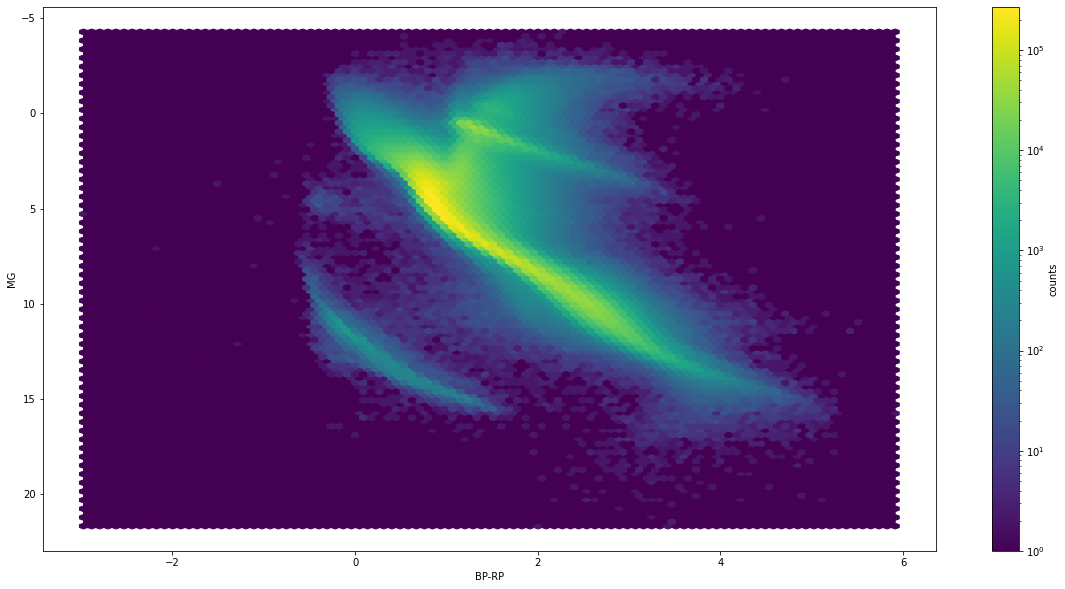

In [28]:
# plot the result

plt.figure(figsize=(20,10))
plt.hexbin(x.phot_bp_mean_mag - x.phot_rp_mean_mag, x.phot_g_mean_mag + 5*np.log10(np.divide(x.parallax,100)),
          norm = LogNorm())
plt.gca().invert_yaxis()
plt.ylabel('MG')
plt.xlabel('BP-RP')
plt.colorbar(label = 'counts')
plt.show()
plt.clf()
plt.close()